# Weekly Influenza Reports by Country

In [22]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data Extraction

In [2]:
influenza = pd.read_csv('influenza_weekly.csv')

c:\users\bayu\opencv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
influenza.shape

(37687, 23)

In [4]:
influenza.head()

REPORT_ID      Country                            WHOREGION      FLUREGION  \
0       1048  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
1       1059  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
2       1060  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
3       1061  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
4       1062  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   

   Year  Week       SDATE       EDATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
0  2015     5  2015-01-26  2015-02-01              43.0               43.0   
1  2015    16  2015-04-13  2015-04-19              22.0               22.0   
2  2015    17  2015-04-20  2015-04-26              26.0               26.0   
3  2015    18  2015-04-27  2015-05-03              17.0               17.0   
4  2015    19  2015-05-04  2015-05-10              23.0               23.0   

   ...  AH5  ANOTSUBTYPED  INF_A  BYAMAGATA  BVICTORIA  BNOTDETERMINED  INF_B  \
0  ...  0.0           0.0      1        0.0        3.0             0.0      3   
1  ...  0.0           0.0      1        0.0        0.0             0.0      0   
2  ...  0.0           0.0      1        0.0        0.0             0.0      0   
3  ...  0.0           0.0      0        0.0        0.0             0.0      0   
4  ...  0.0           0.0      0        0.0        0.0             0.0      0   

   ALL_INF  ALL_INF2     TITLE  
0        4       NaN  Sporadic  
1        1       NaN  Sporadic  
2        1       NaN  Sporadic  
3        0       NaN  Sporadic  
4        0       NaN  Sporadic  

[5 rows x 23 columns]

In [5]:
influenza.describe()

REPORT_ID          Year          Week  SPEC_RECEIVED_NB  \
count   37687.000000  37687.000000  37687.000000      21941.000000   
mean   114148.294823   2011.724786     25.676440        518.493870   
std     61411.705594      3.671224     15.598346       2214.899923   
min      1048.000000   2004.000000      1.000000          0.000000   
25%     65333.500000   2009.000000     12.000000         18.000000   
50%    116482.000000   2012.000000     25.000000         48.000000   
75%    162612.500000   2014.000000     40.000000        126.000000   
max    219405.000000   2020.000000     53.000000      42466.000000   

       SPEC_PROCESSED_NB           AH1     AH1N12009           AH3  \
count       36342.000000  32178.000000  29096.000000  35675.000000   
mean          411.836910      1.732053     34.550454     20.312684   
std          1728.267011     18.273502    241.303055    147.154660   
min             0.000000      0.000000      0.000000      0.000000   
25%            14.000000      0.000000      0.000000      0.000000   
50%            46.000000      0.000000      0.000000      0.000000   
75%           136.000000      0.000000      5.000000      4.000000   
max         42466.000000    840.000000   9735.000000   5498.000000   

                AH5  ANOTSUBTYPED         INF_A     BYAMAGATA     BVICTORIA  \
count  21607.000000  35881.000000  37687.000000  29822.000000  29803.000000   
mean       0.008053     12.295198     59.109215      3.350211      3.455357   
std        0.193694    114.484925    348.252654     50.367823     51.406832   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      2.000000      0.000000      0.000000   
75%        0.000000      1.000000     14.000000      0.000000      0.000000   
max       14.000000   7847.000000  13355.000000   2708.000000   2388.000000   

       BNOTDETERMINED         INF_B       ALL_INF  
count    37518.000000  37687.000000  37687.000000  
mean        11.053947     16.387932     75.497148  
std         69.450239    114.167861    408.013522  
min          0.000000      0.000000      0.000000  
25%          0.000000      0.000000      0.000000  
50%          0.000000      0.000000      4.000000  
75%          3.000000      4.000000     21.000000  
max       1940.000000   4081.000000  13747.000000

In [6]:
influenza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37687 entries, 0 to 37686
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REPORT_ID          37687 non-null  int64  
 1   Country            37687 non-null  object 
 2   WHOREGION          37687 non-null  object 
 3   FLUREGION          37687 non-null  object 
 4   Year               37687 non-null  int64  
 5   Week               37687 non-null  int64  
 6   SDATE              37687 non-null  object 
 7   EDATE              37687 non-null  object 
 8   SPEC_RECEIVED_NB   21941 non-null  float64
 9   SPEC_PROCESSED_NB  36342 non-null  float64
 10  AH1                32178 non-null  float64
 11  AH1N12009          29096 non-null  float64
 12  AH3                35675 non-null  float64
 13  AH5                21607 non-null  float64
 14  ANOTSUBTYPED       35881 non-null  float64
 15  INF_A              37687 non-null  int64  
 16  BYAMAGATA          298

## Cleaning Data

In [7]:
influenza.isnull().sum()

REPORT_ID                0
Country                  0
WHOREGION                0
FLUREGION                0
Year                     0
Week                     0
SDATE                    0
EDATE                    0
SPEC_RECEIVED_NB     15746
SPEC_PROCESSED_NB     1345
AH1                   5509
AH1N12009             8591
AH3                   2012
AH5                  16080
ANOTSUBTYPED          1806
INF_A                    0
BYAMAGATA             7865
BVICTORIA             7884
BNOTDETERMINED         169
INF_B                    0
ALL_INF                  0
ALL_INF2             29003
TITLE                    0
dtype: int64

In [10]:
influenza.drop(['AH1N12009'], axis=1)
influenza.head()

REPORT_ID      Country                            WHOREGION      FLUREGION  \
0       1048  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
1       1059  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
2       1060  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
3       1061  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
4       1062  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   

   Year  Week       SDATE       EDATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
0  2015     5  2015-01-26  2015-02-01              43.0               43.0   
1  2015    16  2015-04-13  2015-04-19              22.0               22.0   
2  2015    17  2015-04-20  2015-04-26              26.0               26.0   
3  2015    18  2015-04-27  2015-05-03              17.0               17.0   
4  2015    19  2015-05-04  2015-05-10              23.0               23.0   

   ...  AH5  ANOTSUBTYPED  INF_A  BYAMAGATA  BVICTORIA  BNOTDETERMINED  INF_B  \
0  ...  0.0           0.0      1        0.0        3.0             0.0      3   
1  ...  0.0           0.0      1        0.0        0.0             0.0      0   
2  ...  0.0           0.0      1        0.0        0.0             0.0      0   
3  ...  0.0           0.0      0        0.0        0.0             0.0      0   
4  ...  0.0           0.0      0        0.0        0.0             0.0      0   

   ALL_INF  ALL_INF2     TITLE  
0        4       NaN  Sporadic  
1        1       NaN  Sporadic  
2        1       NaN  Sporadic  
3        0       NaN  Sporadic  
4        0       NaN  Sporadic  

[5 rows x 23 columns]

## Logistic Regression Model

In [11]:
candidates = {'Week': [5,16,17,18,19],
              'INF_A': [1,1,1,0,0],
              'ALL_INF': [4,1,1,0,0],
              'INF_B': [3,0,0,0,0]}
df = pd.DataFrame(candidates, columns= ['Week','INF_A', 'INF_B', 'ALL_INF'])
print(df)

   Week  INF_A  INF_B  ALL_INF
0     5      1      3        4
1    16      1      0        1
2    17      1      0        1
3    18      0      0        0
4    19      0      0        0


In [18]:
#split data
X = df[['Week','INF_A','INF_B']]
y = df['ALL_INF']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3, 3)
(3,)
(2, 3)
(2,)


In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

print(X_test)
print(y_predict)

   Week  INF_A  INF_B
2    17      1      0
0     5      1      3
[0 1]


In [23]:
pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(pred)
print(accuracy)

[0 1]
0.0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

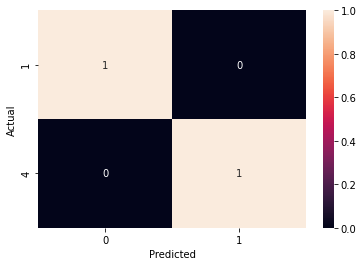

In [24]:
confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## Visualization

<AxesSubplot:>

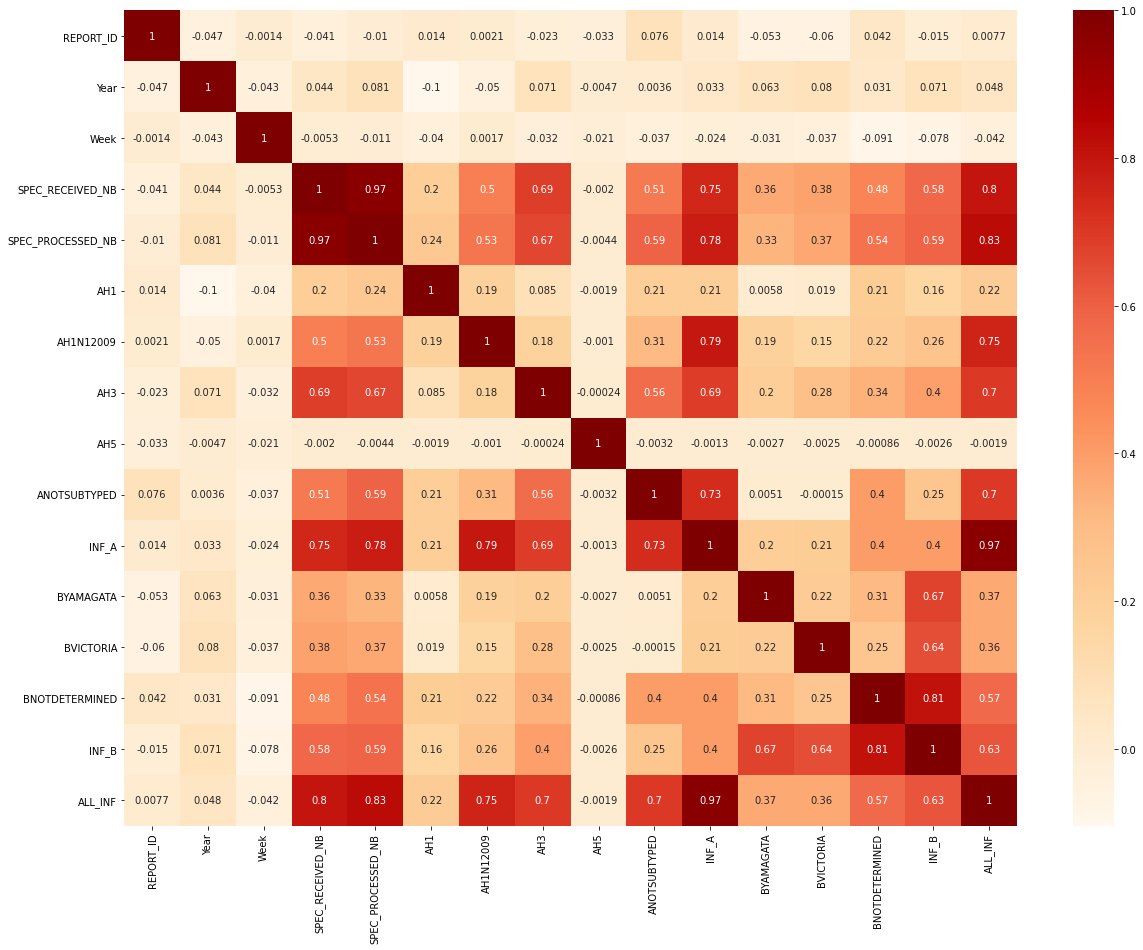

In [25]:
#heatmap correlation
plt.figure(figsize=(20,15))
sns.heatmap(influenza.corr(), annot=True, cmap="OrRd")

In [26]:
#histogram
df.hist(figsize=(10,10))

array([[<AxesSubplot:title={'center':'Week'}>,
        <AxesSubplot:title={'center':'INF_A'}>],
       [<AxesSubplot:title={'center':'INF_B'}>,
        <AxesSubplot:title={'center':'ALL_INF'}>]], dtype=object)

In [27]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(influenza.Week)
plt.title("Weekly Influenza Report")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [28]:
#country
influenza.Country.value_counts()

China                       787
Madagascar                  763
Philippines                 755
Japan                       741
Australia                   731
                           ... 
Central African Republic      9
Guadeloupe                    8
Congo                         8
Mauritius                     4
North Macedonia               2
Name: Country, Length: 125, dtype: int64

In [29]:
#WHO region
influenza.WHOREGION.value_counts()

European Region of WHO                 12960
Western Pacific Region of WHO           6721
African Region of WHO                   6281
Region of the Americas of WHO           4686
Eastern Mediterranean Region of WHO     3696
South-East Asia Region of WHO           3343
Name: WHOREGION, dtype: int64

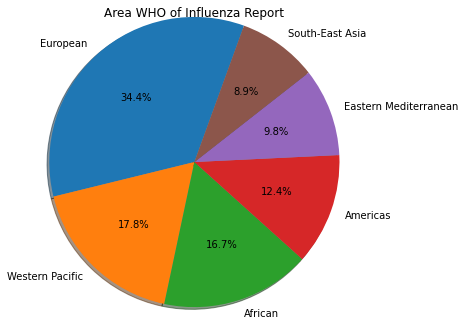

In [30]:
#print('pie chart of WHO region')
plt.figure(figsize=(5,6))
who_region = [np.count_nonzero(influenza['WHOREGION'] == "European Region of WHO"),
             np.count_nonzero(influenza['WHOREGION'] == "Western Pacific Region of WHO"),
             np.count_nonzero(influenza['WHOREGION'] == "African Region of WHO"),
             np.count_nonzero(influenza['WHOREGION'] == "Region of the Americas of WHO"),
             np.count_nonzero(influenza['WHOREGION'] == "Eastern Mediterranean Region of WHO"),
             np.count_nonzero(influenza['WHOREGION'] == "South-East Asia Region of WHO")]
activities = ['European', 'Western Pacific', 'African', 'Americas', 'Eastern Mediterranean', 'South-East Asia']
plt.title("Area WHO of Influenza Report")
plt.pie(who_region, labels=activities, radius=1.3, startangle=70, autopct='%.1f%%', shadow=True)
plt.show()

In [31]:
#flu region
influenza.FLUREGION.value_counts()

South West Europe                5368
South-East Asia                  3531
Southern Asia                    3480
Eastern Europe                   3259
Northern Europe                  3000
Western Asia                     2298
Western Africa                   2234
Eastern Africa                   2141
Oceania Melanesia Polynesia      2132
Eastern Asia                     2065
Northern Africa                  1634
Central America and Caribbean    1634
Tropical South America           1373
Temperate South America          1133
Middle Africa                     853
Southern Africa                   617
North America                     546
Central Asia                      389
Name: FLUREGION, dtype: int64

In [32]:
#title of influenza
influenza.TITLE.value_counts()

Sporadic               18259
No Activity             9710
Local Outbreak          4812
Regional Outbreak       2696
Widespread Outbreak     2210
Name: TITLE, dtype: int64

In [33]:
#print('bar chart of title influenza')
plt.figure(figsize=(10,6))
sns.countplot(influenza.TITLE)
plt.title("Title of Influenza")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.patches.Wedge at 0x1fecb19bca0>,
 [Text(-1.202122707901716, 0.7744682015080064, 'Sporadic'),
  Text(0.2677928240093613, -1.4047017489165063, 'No Activity'),
  Text(1.408933582749937, -0.24455297871714202, 'Local Outbreak'),
  Text(1.3094832241719716, 0.574590015238847, 'Widespread Outbreak'),
  Text(0.9730028207950088, 1.0479339247896102, 'Regional Outbreak')],
 [Text(-0.6557032952191177, 0.42243720082254893, '48.4%'),
  Text(0.14606881309601522, -0.766200953954458, '25.8%'),
  Text(0.7685092269545111, -0.1333925338457138, '12.8%'),
  Text(0.7142635768210753, 0.31341273558482563, '5.9%'),
  Text(0.5307288113427321, 0.5716003226125147, '7.2%')])

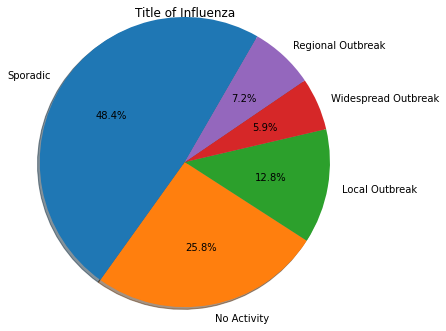

In [34]:
#print('pie chart of title region')
plt.figure(figsize=(5,6))
title = [np.count_nonzero(influenza['TITLE'] == "Sporadic"),
        np.count_nonzero(influenza['TITLE'] == "No Activity"),
        np.count_nonzero(influenza['TITLE'] == "Local Outbreak"),
        np.count_nonzero(influenza['TITLE'] == "Widespread Outbreak"),
        np.count_nonzero(influenza['TITLE'] == "Regional Outbreak")]
activities = ['Sporadic', 'No Activity', 'Local Outbreak', 'Widespread Outbreak', 'Regional Outbreak']
plt.title("Title of Influenza")
plt.pie(title, labels=activities, radius=1.3, startangle=60, autopct='%.1f%%', shadow=True)

In [35]:
#print('line plot of monthly and yearly progress of influenza')
sns.lineplot(data=influenza, x='Year', y='Week', hue='TITLE')

<AxesSubplot:xlabel='Year', ylabel='Week'>

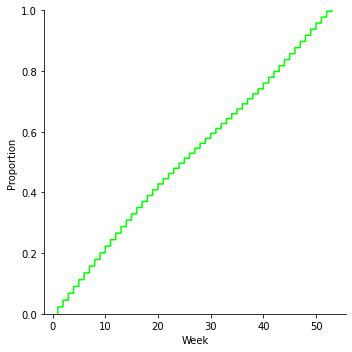

In [36]:
#print('displot of density and proportion of week progress of influenza')
sns.displot(influenza, x='Week', kind='kde', color='darkorange')
sns.displot(influenza, x='Week', kind='ecdf', color='lime')

In [37]:
#print('kde plot of density weekly progress of influenza')
sns.kdeplot(data=influenza, x='Week', hue='TITLE')

<AxesSubplot:xlabel='Week', ylabel='Density'>

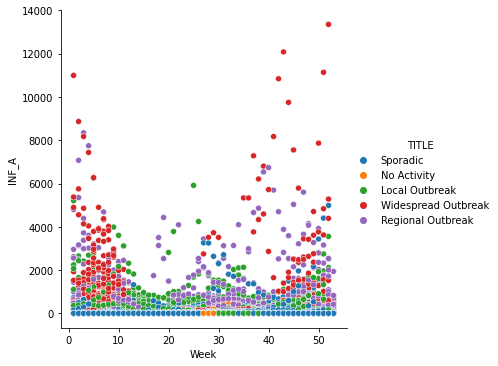

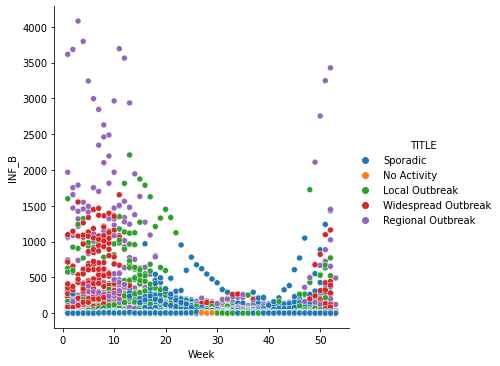

In [38]:
#print('relplot of weekly progress influenza A and B')
sns.relplot(data=influenza, x='Week', y='INF_A', hue='TITLE')
sns.relplot(data=influenza, x='Week', y='INF_B', hue='TITLE')